In [1]:
import pandas as pd

df = pd.read_csv('merged_dataset.csv')    

In [6]:
import sqlite3
import pandas as pd

# Establish a connection to the SQLite database
conn = sqlite3.connect('total_dataset.db')

# Read data from a table
crime_data= pd.read_sql_query("SELECT * FROM crime_data", conn)
arrest_data = pd.read_sql_query("SELECT * FROM arrest_data", conn)
# Display the DataFrame
print(crime_data.info())
print(arrest_data.info())
print("\n")
print(crime_data.head(5))
print("\n")
print(arrest_data.head(5))
# Close the connection
conn.close()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623104 entries, 0 to 623103
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date of Crime  623104 non-null  object
 1   AREA NAME      623104 non-null  object
 2   Crm Cd Desc    623104 non-null  object
 3   Vict Age       623104 non-null  int64 
 4   Vict Sex       623104 non-null  object
 5   Vict Descent   623104 non-null  object
dtypes: int64(1), object(5)
memory usage: 28.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251907 entries, 0 to 251906
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Date of Arrest            251907 non-null  object
 1   Arrest Area Name          251907 non-null  object
 2   Charge Group Description  251907 non-null  object
 3   Age                       251907 non-null  int64 
 4   Sex Code                  251907 non-

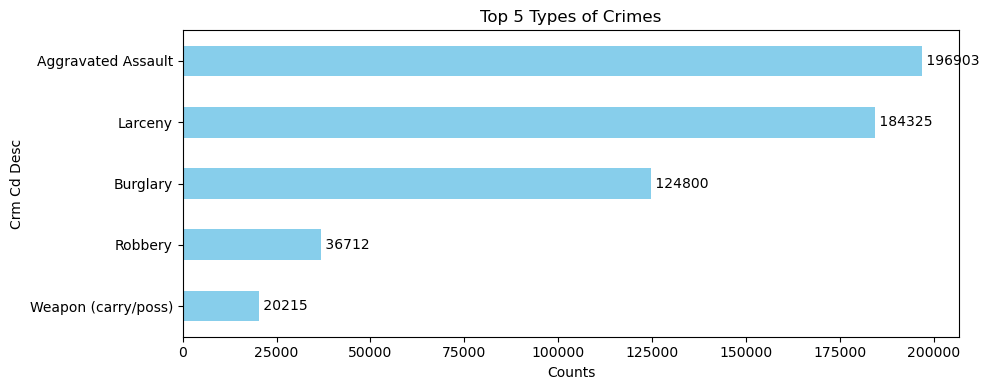

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each crime type, then get the top 10
crime_counts = crime_data['Crm Cd Desc'].value_counts().head(5)

# Create a bar plot for the top 10 types of crimes
plt.figure(figsize=(10, 4))
crime_counts.plot(kind='barh', color='skyblue')
plt.title('Top 5 Types of Crimes')
plt.xlabel('Counts')
plt.gca().invert_yaxis()  # To align the largest bar on top

# Display frequencies on the bars
for i, value in enumerate(crime_counts):
    plt.text(value, i, f' {value}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


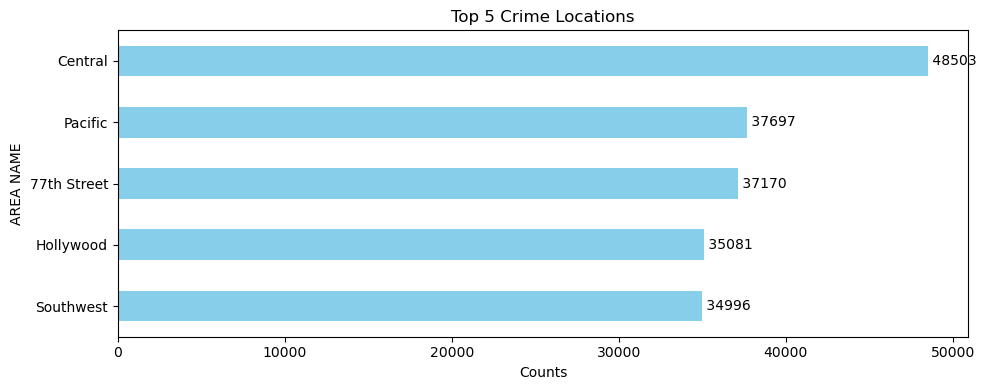

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each crime location and get the top 10
crime_counts = crime_data['AREA NAME'].value_counts().head(5)

# Create a bar plot for the top 5 crime locations
plt.figure(figsize=(10, 4))
crime_counts.plot(kind='barh', color='skyblue')
plt.title('Top 5 Crime Locations')
plt.xlabel('Counts')
plt.gca().invert_yaxis()  # To align the largest bar on top

# Annotate frequency on the bars
for i, value in enumerate(crime_counts):
    plt.text(value, i, f' {value}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


Correlation between Crime Count and Arrest Count:
              Crime Count  Arrest Count
Crime Count      1.000000      0.231009
Arrest Count     0.231009      1.000000


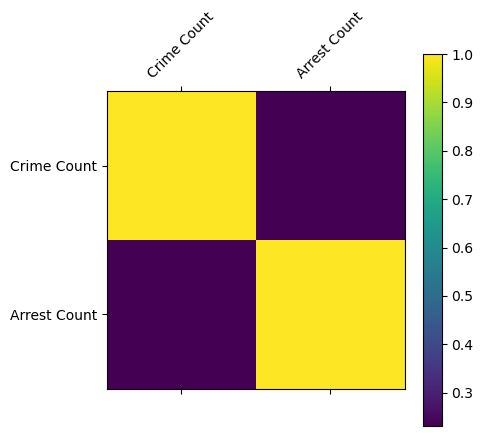

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming crime_data and arrest_data are already loaded and preprocessed

# Convert dates and ensure numeric data types
crime_data['Date of Crime'] = pd.to_datetime(crime_data['Date of Crime']).dt.year
arrest_data['Date of Arrest'] = pd.to_datetime(arrest_data['Date of Arrest']).dt.year

# Group and count incidents
crime_counts = crime_data.groupby(['AREA NAME', 'Date of Crime']).size().reset_index(name='Crime Count')
arrest_counts = arrest_data.groupby(['Arrest Area Name', 'Date of Arrest']).size().reset_index(name='Arrest Count')

# Merge the datasets on area and year
merged_data = pd.merge(crime_counts, arrest_counts, left_on=['AREA NAME', 'Date of Crime'], right_on=['Arrest Area Name', 'Date of Arrest'], how='outer')
merged_data.fillna(0, inplace=True)  # Handling NaN values

# Filter for numeric correlation only
numeric_data = merged_data[['Crime Count', 'Arrest Count']]

# Calculate correlation
correlation = numeric_data.corr()
print("Correlation between Crime Count and Arrest Count:")
print(correlation)

# Visualize the correlation matrix
plt.matshow(numeric_data.corr())
plt.colorbar()
plt.xticks(range(len(numeric_data.columns)), numeric_data.columns, rotation=45)
plt.yticks(range(len(numeric_data.columns)), numeric_data.columns)
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


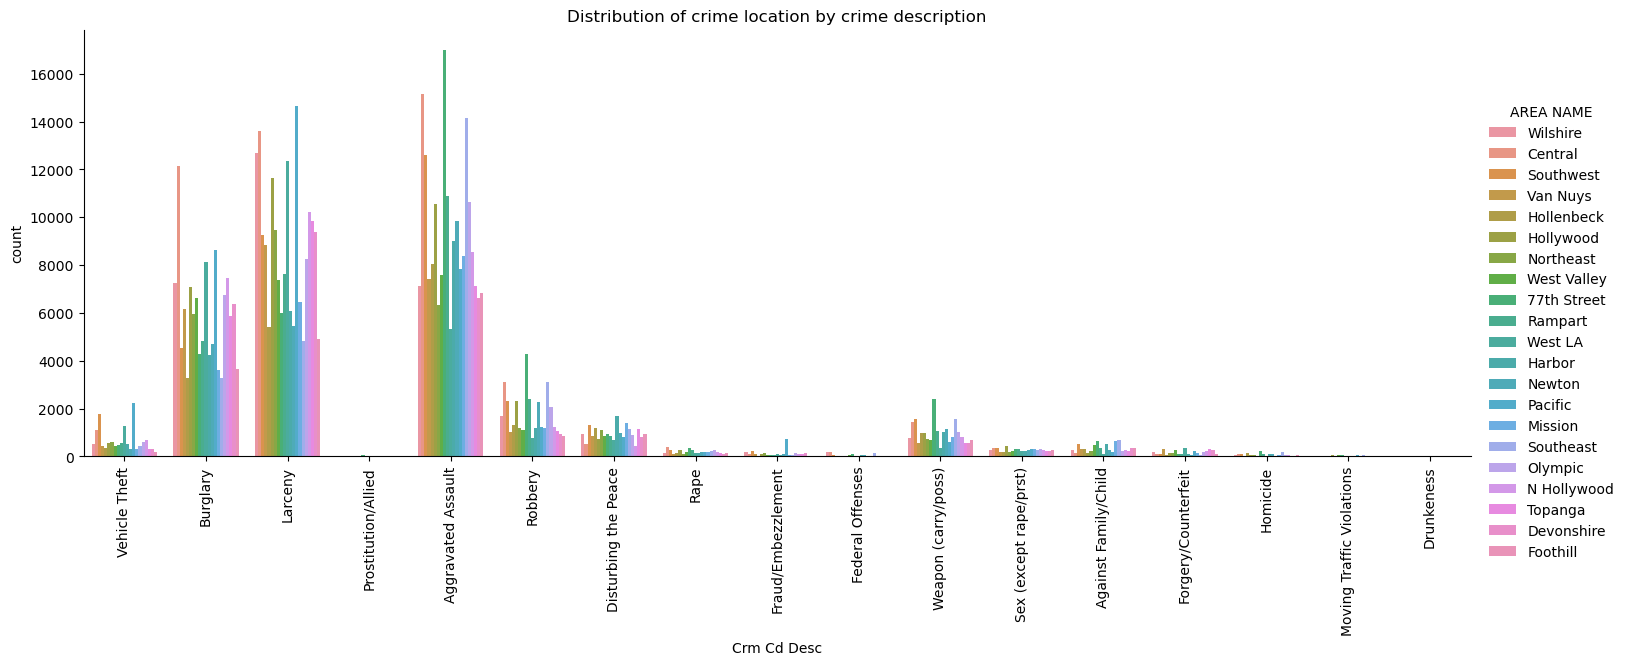

In [9]:
#3. Demographic Analysis of Crime Victims
# Plotting distribution of victim demographics by crime type
import seaborn as sns
sns.catplot(x='Crm Cd Desc', hue='AREA NAME', kind='count', data=crime_data, height=5, aspect=3)
plt.title('Distribution of crime location by crime description')
plt.xticks(rotation=90)
plt.show()


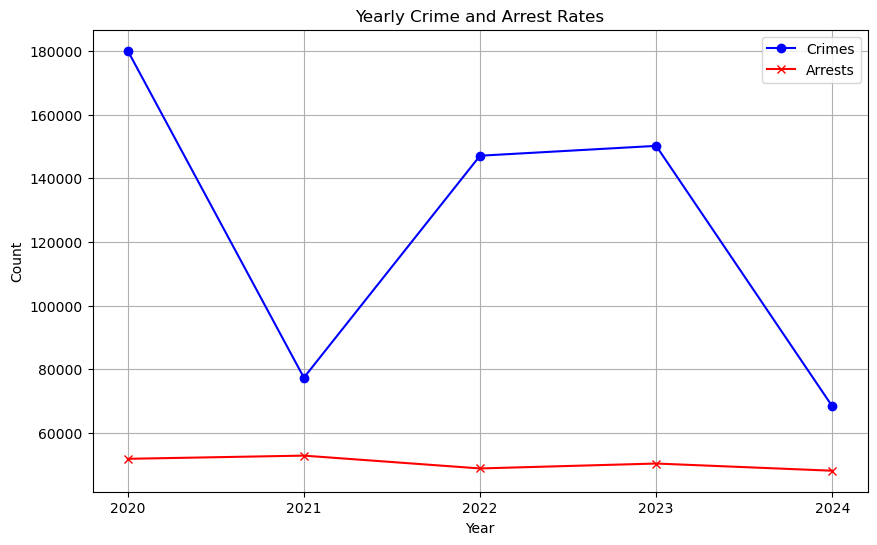

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime
crime_data['Date of Crime'] = pd.to_datetime(crime_data['Date of Crime'])
arrest_data['Date of Arrest'] = pd.to_datetime(arrest_data['Date of Arrest'])

# Extract year from date
crime_data['Year'] = crime_data['Date of Crime'].dt.year
arrest_data['Year'] = arrest_data['Date of Arrest'].dt.year

# Group by year and count occurrences
crime_counts = crime_data.groupby('Year').size()
arrest_counts = arrest_data.groupby('Year').size()

# Prepare a DataFrame for plotting
data = pd.DataFrame({
    'Crimes': crime_counts,
    'Arrests': arrest_counts
}).fillna(0)  # Fill NaN with 0 to handle years with no data

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Crimes'], label='Crimes', marker='o', linestyle='-', color='blue')
plt.plot(data.index, data['Arrests'], label='Arrests', marker='x', linestyle='-', color='red')
plt.title('Yearly Crime and Arrest Rates')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(data.index)  # Ensure all years are labeled
plt.legend()
plt.grid(True)
plt.show()



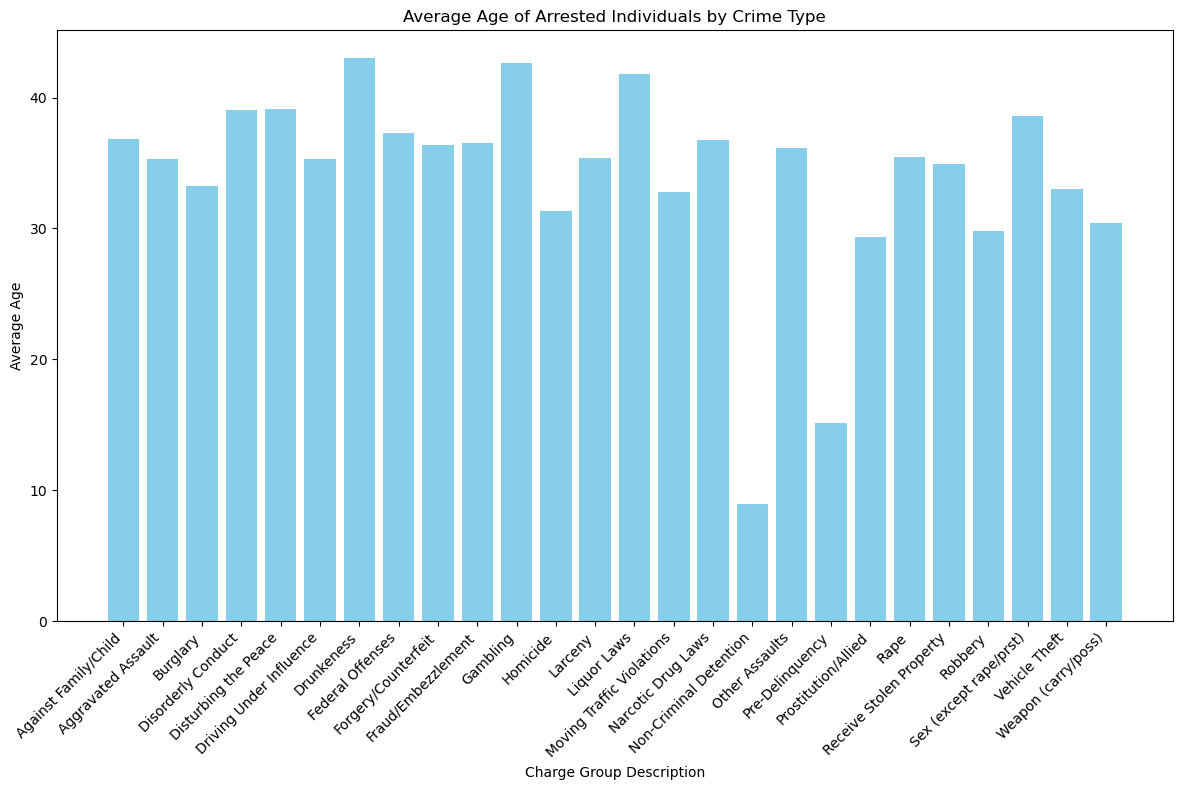

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Charge Group Description' and calculate the mean age
average_age_data=arrest_data.groupby('Charge Group Description')['Age'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_age_data['Charge Group Description'], average_age_data['Age'], color='skyblue')
plt.xlabel('Charge Group Description')
plt.ylabel('Average Age')
plt.title('Average Age of Arrested Individuals by Crime Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13736\2488695813.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent'], inplace=True)


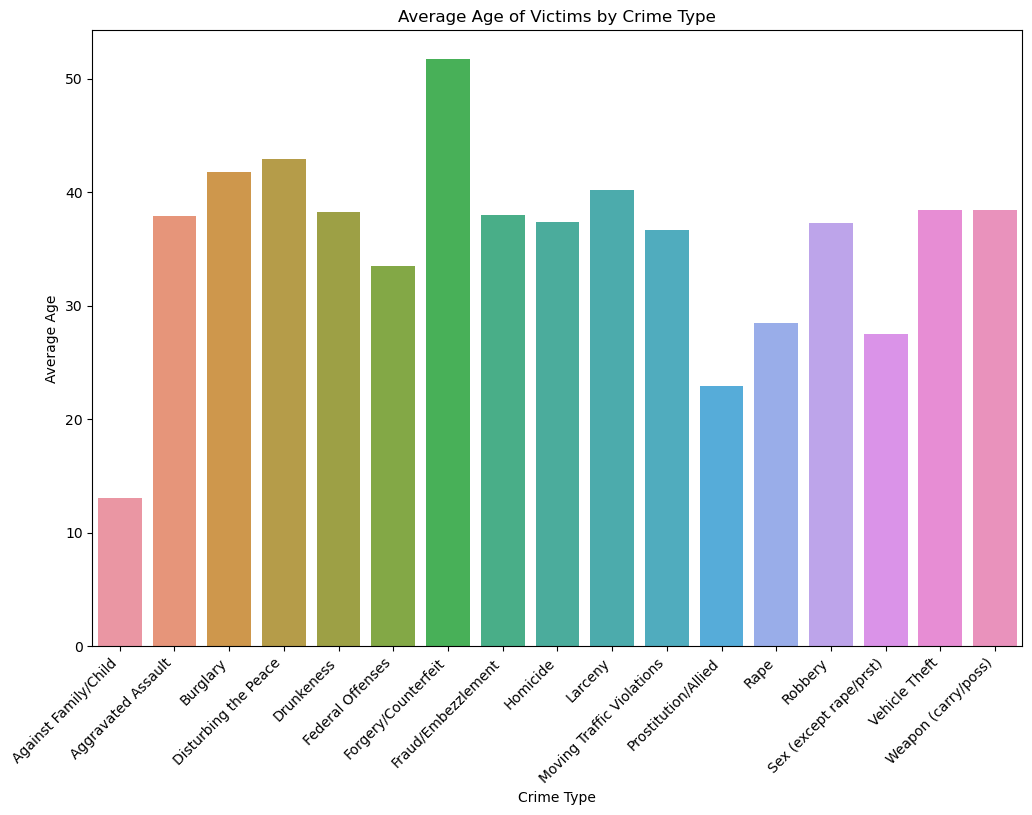

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume crime_data is already defined somewhere else, ensure to load/import it before using
data = crime_data

# Data cleaning and preparation
data['Date of Crime'] = pd.to_datetime(data['Date of Crime'], errors='coerce')
data['Vict Age'] = pd.to_numeric(data['Vict Age'], errors='coerce')
data = data[data['Vict Age'] > 0]  # Assume '0' is an erroneous entry
data.dropna(subset=['Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent'], inplace=True)

# Grouping data and aggregating statistics
aggregated_data = data.groupby('Crm Cd Desc').agg({
    'Vict Age': ['mean', 'std', 'min', 'max'],
    'Vict Sex': lambda x: x.value_counts().index[0],  # Most common sex
    'Vict Descent': lambda x: x.value_counts().index[0]  # Most common descent
}).reset_index()

# Fixing column names after aggregation
aggregated_data.columns = ['Crm Cd Desc', 'Age Mean', 'Age Std', 'Age Min', 'Age Max', 'Most Common Sex', 'Most Common Descent']

# Plotting the results
plt.figure(figsize=(12, 8))
age_plot = sns.barplot(x='Crm Cd Desc', y='Age Mean', data=aggregated_data)
age_plot.set_title('Average Age of Victims by Crime Type')
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Average Age')
plt.xlabel('Crime Type')
plt.show()


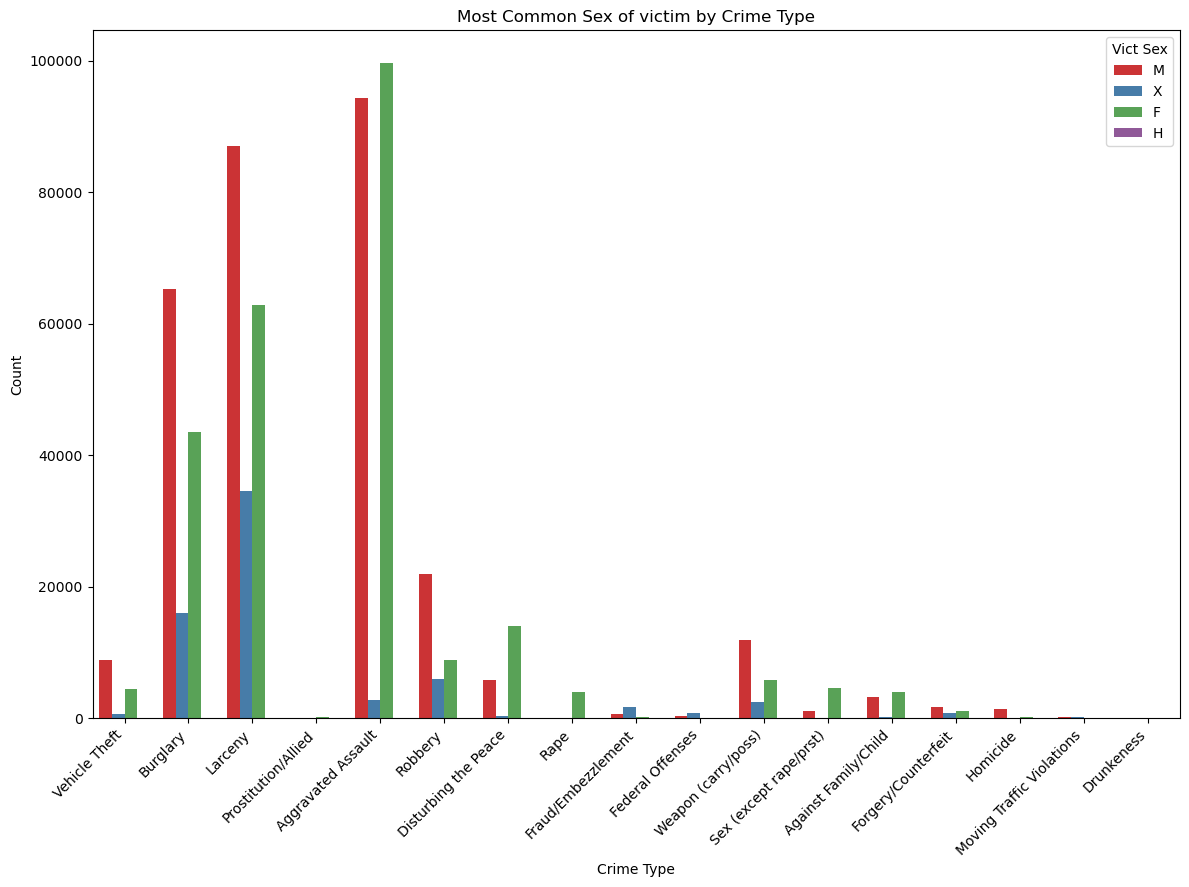

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clean and prepare data
crime_data['Date of Crime'] = pd.to_datetime(crime_data['Date of Crime'], errors='coerce')
crime_data.dropna(subset=['Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent'], inplace=True)

# Grouping and aggregating the data to find the most common sex and descent for each crime type
aggregated_data = crime_data.groupby('Crm Cd Desc').agg({
    'Vict Sex': lambda x: x.mode().iloc[0],  # Most common sex
    'Vict Descent': lambda x: x.mode().iloc[0]  # Most common descent
}).reset_index()

# Setting up the figure for plotting
plt.figure(figsize=(12, 16))

# Creating a bar plot for the most common sex by crime type
plt.subplot(2, 1, 1)  # 1 row, 2 columns, 1st subplot
sex_plot = sns.countplot(x='Crm Cd Desc', hue='Vict Sex', data=crime_data, palette='Set1')
sex_plot.set_title('Most Common Sex of victim by Crime Type')
sex_plot.set_xticklabels(sex_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Count')
plt.xlabel('Crime Type')

plt.tight_layout()
plt.show()


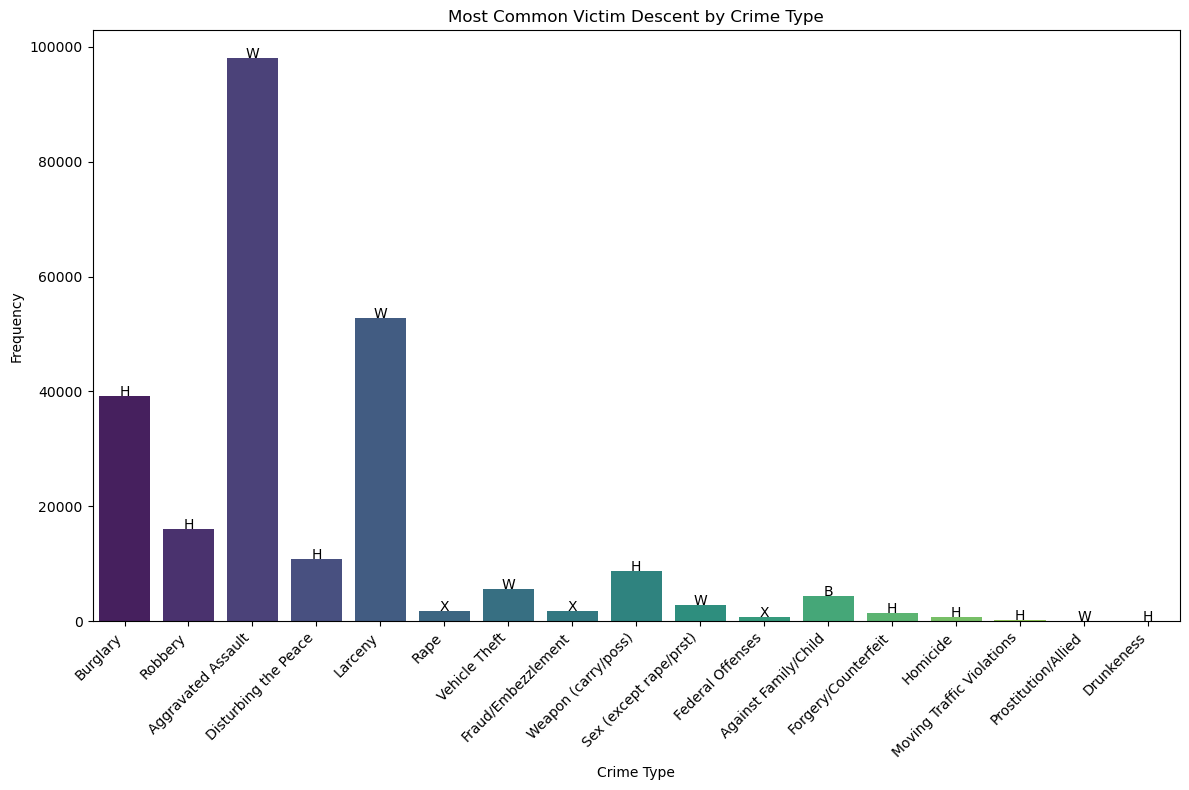

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming crime_data is loaded and available as a pandas DataFrame
# crime_data = pd.read_csv('path_to_your_crime_data.csv') # Uncomment if needed

# Clean and prepare data
crime_data.dropna(subset=['Crm Cd Desc', 'Vict Descent'], inplace=True)

# Group by 'Crm Cd Desc' and determine the most common 'Vict Descent' for each crime type
most_common_descent = crime_data.groupby('Crm Cd Desc')['Vict Descent'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Convert this aggregated data into a format suitable for plotting with seaborn
# We need a dataframe that duplicates the crime descriptions according to their frequency counts
plot_data = crime_data[crime_data.apply(lambda row: row['Vict Descent'] == most_common_descent[most_common_descent['Crm Cd Desc'] == row['Crm Cd Desc']]['Vict Descent'].values[0], axis=1)]

plt.figure(figsize=(12, 8))

# Plotting the frequency of the most common descent by crime type
descent_plot = sns.countplot(x='Crm Cd Desc', data=plot_data, palette='viridis')
descent_plot.set_title('Most Common Victim Descent by Crime Type')
descent_plot.set_xticklabels(descent_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Frequency')
plt.xlabel('Crime Type')

# Annotating each bar with the name of the most common descent
for p, descent in zip(descent_plot.patches, most_common_descent['Vict Descent']):
    height = p.get_height()  # get the height of each bar
    # Placing the text at the end of the bar
    descent_plot.text(p.get_x() + p.get_width() / 2., height + 0.1, descent, ha="center")

plt.tight_layout()
plt.show()
